## About the Dataset

The Telco Customer Churn data contains information about a fictional telco company that provide home phone and internet services to 7043 customers. The data set includes information about:

- **Demographic Information About Customers** (gender, senior citizen, partner, dependents)
- **Customer Account Information** (how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges)
- **Services that Each Customer has Signed Up For** (phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies)
- **Churn Target Column**: Whether the customer churned or not (Yes or No)

Columns:
- customerID
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

## Libraries

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)

## Functions

In [83]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

def calc_outlier_range(col, times_IQR=1.5):
    # times_IQR - Define how many times IQR will used to calc Lower and Upper Range
    sorted(col)                              # Sorted series object
    Q1,Q3 = np.percentile(col,[25,75])       # Calc Q1 and Q3
    IQR = Q3-Q1                              # Calc the distance between Q3 and Q1
    lr= Q1-(times_IQR * IQR)                 # Calc Lower Range
    ur= Q3+(times_IQR * IQR)                 # Calc Upper Range
    return lr, ur

## Reading the Data

In [3]:
raw = pd.read_csv('../data/telco_customer_churn.csv', encoding='utf-8')
raw.shape, raw.columns

((7043, 21),
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object'))

## Exploratory Data Analysis

The dataset contains 7043 rows and 21 columns. We'll analyze all dataset and check if exists duplicated rows or incorrect data types. Follow below a list with some steps that should be considered during exploratory data analysis.

- Duplicate rows analysis
- Incorrect data type analysis
- Null values analysis
- Normalization of categorical variables
- Outliers analysis

In [4]:
dataoveriew(raw, 'Overview of the dataset')
display(raw.head())

Overview of the dataset:

Number of rows:  7043

Number of features: 21

Data Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: 0

Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Duplicate Rows Analysis**

There isn't duplicate rows in this dataset.

In [5]:
raw.shape, raw.drop_duplicates().shape

((7043, 21), (7043, 21))

**Null Values Analysis**

In [81]:
raw.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Incorrect Data Type Analysis**

- Transforming values from Yes/No to in 1/0 and cast to int
- Replace from Yes/No/No X service to 1/0/-1

In [25]:
raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [112]:
prep = raw.copy()

# Replace Yes/No to 1/0 and cast to int
cols = ['Partner','Dependents','PhoneService','PaperlessBilling']
for c in cols: 
    prep[c].replace({'Yes':1,'No':0}, inplace=True)
    prep[c] = prep[c].astype(int)

# Replace from Yes/No/No phone service to 1/0/-1
cols = ['MultipleLines']
for c in cols: 
    prep[c].replace({'Yes':1,'No':0,'No phone service':-1}, inplace=True)
    prep[c] = prep[c].astype(int)

# Replace from Yes/No/No internet service to 1/0/-1
cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for c in cols: 
    prep[c].replace({'Yes':1,'No':0,'No internet service':-1}, inplace=True)
    prep[c] = prep[c].astype(int)

# TotalCharges: Convert to numeric and replace empty values by NaN, cast type to float, fill nulls with 0
prep['TotalCharges'] = pd.to_numeric(prep['TotalCharges'], errors='coerce')
prep['TotalCharges'] = prep['TotalCharges'].astype(float)
prep['TotalCharges'].fillna(0, inplace=True)

In [113]:
prep.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService      object
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract             object
PaperlessBilling      int32
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**Outlier Analysis**

In a preliminary analysis we decided to use the IQR method to detect outliers because it is very simple to understand and use. After calc IQR distance and detect outliers, we'll flag it on dataset and use this data on test dataset.

Method: 1,5 * IQR

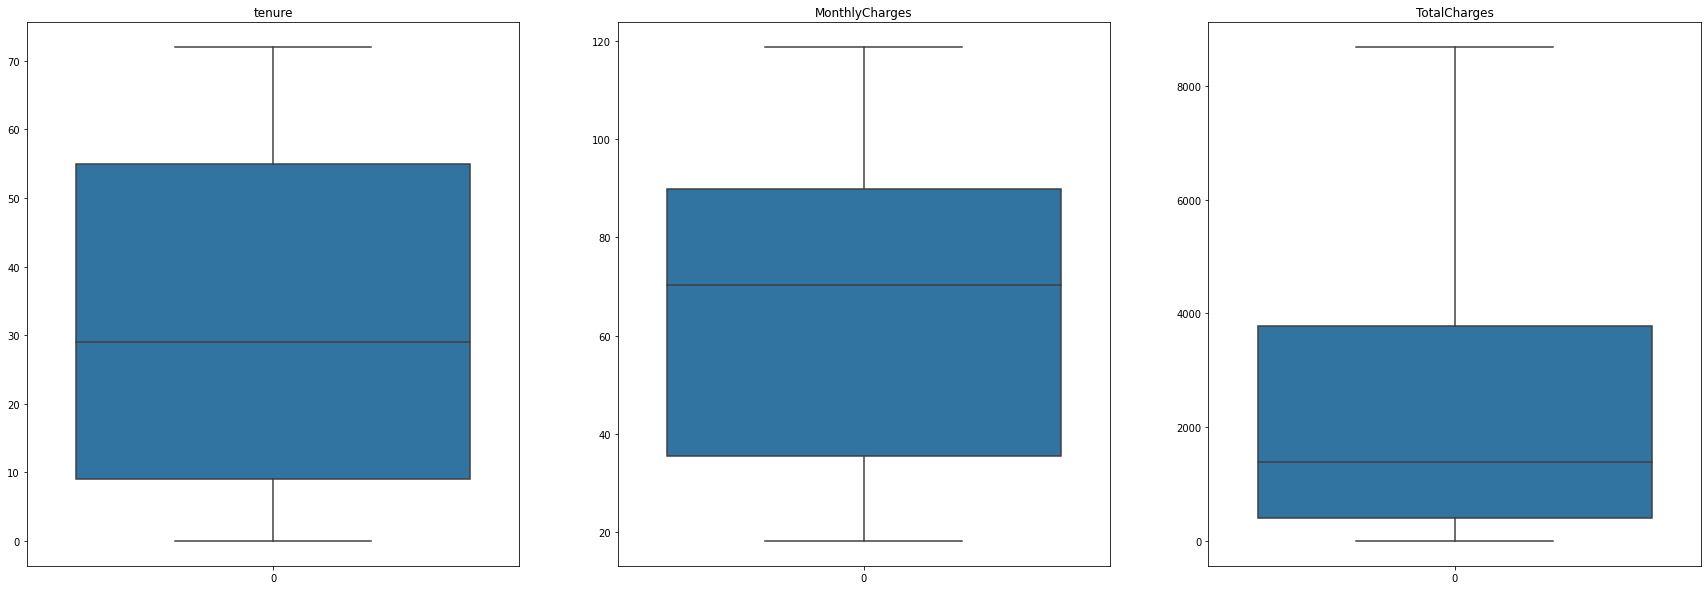

In [114]:
cols = ['tenure','MonthlyCharges','TotalCharges']
fig, (axs1,axs2,axs3) = plt.subplots(1, 3, figsize=(30,10))
for ax, col in zip([axs1,axs2,axs3], cols): sns.boxplot(data=prep[col], ax=ax).set_title(f'{col}')

After done the analysis considering times_IQR=1.5 parameter, we concluded that there isn't outliers in.

In [109]:
columns_to_detect_outliers = ['tenure','MonthlyCharges','TotalCharges']
for column in columns_to_detect_outliers:
    # Get range IQR
    lr, ur = calc_outlier_range(prep[column])
    
    # Mark as a outlier
    prep[f'{column}_outlier'] = np.where(prep[column]>ur,True,False)

    # Fill outlier values with Upper Range or Lower Range
    prep[column]=np.where(prep[column]>ur,ur,prep[column])
    prep[column]=np.where(prep[column]<lr,lr,prep[column])

In [111]:
cols = ['tenure_outlier','MonthlyCharges_outlier','TotalCharges_outlier']
for c in cols: print(prep[c].value_counts())

False    7043
Name: tenure_outlier, dtype: int64
False    7043
Name: MonthlyCharges_outlier, dtype: int64
False    7043
Name: TotalCharges_outlier, dtype: int64


**Normalization of categorical variabless**

In [122]:
# Select cols to apply OneHotEncoder
cols_to_encoder = ['gender','InternetService','Contract','PaymentMethod']

# Create and fit encoder
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(prep[cols_to_encoder])

# Transform features
features = one_hot_encoder.transform(prep[cols_to_encoder]).toarray()
features_col_name = one_hot_encoder.get_feature_names(cols_to_encoder)

# Dataframe with encode features
df_features_encoder = pd.DataFrame(data=features, columns=features_col_name)
df_features_encoder['customerID'] = prep['customerID']

# Final dataframe
df_features = prep.copy()
df_features.drop(columns=cols_to_encoder, inplace=True, axis=1)
df_features = df_features.merge(df_features_encoder, on=['customerID'], how='inner')

df_features.shape

c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(7043, 29)

Rename column names to remove special chars

In [129]:
cols = [col.replace(' ','_').replace('-','_').replace('(','').replace(')','') for col in df_features.columns]
df_features.columns = cols

df_features.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'InternetService_No',
       'Contract_Month_to_month', 'Contract_One_year', 'Contract_Two_year',
       'PaymentMethod_Bank_transfer_automatic',
       'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check'],
      dtype='object')

**Saving Datasets**

In [130]:
prep.to_csv('../data/prep_telco_customer_churn.csv', index=False, encoding='utf-8')
df_features.to_csv('../data/prep_onehot_telco_customer_churn.csv', index=False, encoding='utf-8')